# Exercice RNN

**Tâche : Importer les bibliothèques de base que vous pensez utiliser**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Données

Informations sur cet ensemble de données : https://fred.stlouisfed.org/series/IPN31152N


Unités :  Indice 2012=100, pas d'ajustement de saisonnalité

Fréquence :  Mensuelle

L'indice de production industrielle (IP) mesure la production réelle de tous les établissements concernés situés aux États-Unis, quel que soit leur propriétaire, mais pas ceux situés sur le territoire américain.

SCIAN = 31152

Code source : IP.N31152.N

Citation suggérée :
Conseil des gouverneurs de la Réserve fédérale (États-Unis), Production industrielle : Biens non durables : Glaces et desserts glacés [IPN31152N], extrait de FRED, Federal Reserve Bank of St. Louis ; https://fred.stlouisfed.org/series/IPN31152N, 16 novembre 2019.

# Tâches du projet

**Tâche : Lire le dataset "Frozen_Dessert_Production.csv" du dossier DATA. Trouvez comment définir la date en tant qu'index de colonne datetime**

In [ ]:
# Code ici
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE',parse_dates=True)




df.columns=['Production']
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Tâche : Changer le nom de la colonne avec le nom Production**

In [ ]:
# Code ici

df.columns=['Production']
df


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**Tâche : Tracer les séries temporelles**

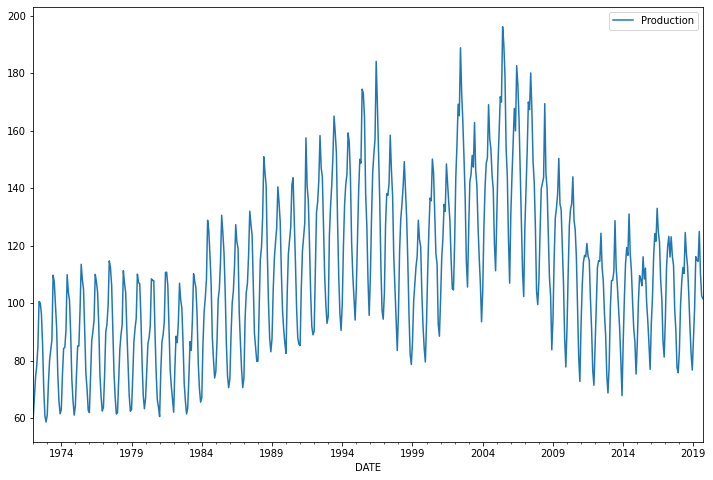

In [ ]:
df.plot(figsize=(12,8))

## Répartition Entraînement / Test

**Tâche : Déterminer la longueur (taille) du dataset**

In [ ]:
# Code ici

In [ ]:
len(df)

573

**Tâche : Diviser les données en un set d'entraînement et un set de test où l'ensemble de test correspond aux données des 24 derniers mois.**

In [ ]:
size_test = 24
index_test = len(df)-size_test

In [ ]:
train_set = df.iloc[:index_test]
test_set = df.iloc[index_test:]

In [ ]:
len(test_set)


24

In [ ]:
len(train_set)

549

In [ ]:
train_set

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-05-01,116.0635
2017-06-01,123.0870
2017-07-01,116.2639


In [ ]:
test_set

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


## Mise à l'échelle des données

**Tâche : Utiliser MinMaxScaler pour mettre à l'échelle les ensembles de données d'entraînement et de test dans leurs versions mises à l'échelle.**

In [ ]:
# Code ici
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_set)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train_set)
scaled_test = scaler.transform(test_set)

In [ ]:
#scaled_train

## Générateur de séries temporelles

**Tâche : Créer un objet TimeSeriesGenerator qui se base sur les données scaled_train. La longueur du batch dépend de vous, mais elle doit être au minimum de 18 pour saisir une saisonnalité d'une année complète.**

In [ ]:
# Code ici

In [ ]:
length = 18 # taille du batch
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size= 1)

In [ ]:
x , y = generator[0]
x

In [ ]:
y

array([[0.3542551]])

In [ ]:
print(x.shape)
print(y.shape)

(1, 18, 1)
(1, 1)


## Création du modèle

**Tâche : Créer un modèle séquentiel de Keras avec autant de neurones (units) LSTM que vous voulez et une couche Dense finale.**

In [ ]:
# Code ici
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
n_features = 1 # nombre de prediction que nous voulons faire 

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape = (length, n_features)))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 13,001
Trainable params: 13,001
Non-trainable params: 0
_________________________________________________________________


**Tâche : Créer un générateur pour l'ensemble de test /validation à l'échelle. NOTE : Vérifiez que la longueur de votre batch est adaptée à la taille de l'ensemble de test, comme indiqué dans la vidéo RNN Time Series**.

In [ ]:
# Code ici

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)
validation_generator[0]

(array([[[0.23134679],
         [0.13655347],
         [0.12472921],
         [0.18015997],
         [0.29691617],
         [0.35382169],
         [0.39102302],
         [0.37592272],
         [0.47940099],
         [0.42586022],
         [0.3928192 ],
         [0.32470899],
         [0.2434103 ],
         [0.17289089],
         [0.13163033],
         [0.20608099],
         [0.28689318],
         [0.41822681]]]), array([[0.40948951]]))

**Tâche : Créer un callback EarlyStopping qui contrôle val_loss.**

In [ ]:
# Code ici
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

**Tâche : Adapter le modèle au générateur, laisser le EarlyStopping dicter le nombre d'epochs, donc n'hésitez pas à régler le paramètre à un niveau élevé.**

In [ ]:
# Code ici
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
531/531 [==============================] - 6s 9ms/step - loss: 0.0293 - val_loss: 0.0041
Epoch 2/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0098 - val_loss: 0.0021
Epoch 3/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 4/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0029 - val_loss: 0.0019
Epoch 5/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 6/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0036 - val_loss: 0.0038


**Tâche : Tracer l'historique des pertes survenues pendant l'entraînement.**

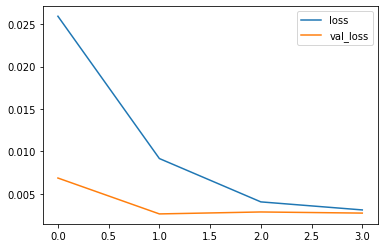

In [ ]:
# Code ici
losses= pd.DataFrame(model.history.history)
losses.plot()

## Évaluation sur les données Test

**Tâche : Prédictions pour votre gamme de données de test (les 12 derniers mois de l'ensemble des données). N'oubliez pas d'inverser vos transformations d'échelle. Votre résultat final doit être un DataFrame avec deux colonnes, les valeurs réelles du test et les prédictions.**

In [ ]:
# Code ici
nb_features=1
test_prediction=[]
first_eval_batch=scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, nb_features)

for i in range(len(test_set)):
  prediction=model.predict(current_batch)[0]
  test_prediction.append(prediction)
  current_batch = np.append(current_batch[:,1:,:],[[prediction]], axis=1)

In [ ]:
true_prediciton = scaler.inverse_transform(test_prediction)

In [ ]:
test_set['prediction'] = true_prediciton

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_set

,Production,prediction
DATE,,
2017-10-01,90.4732,88.120444
2017-11-01,77.4378,80.483166
2017-12-01,75.8118,79.217726
2018-01-01,83.4343,85.209610
2018-02-01,99.4899,96.505139
2018-03-01,107.3152,106.186470
2018-04-01,112.4309,112.794605
2018-05-01,110.3544,116.982065
2018-06-01,124.5841,118.816906


**Tâche : Tracez vos prédictions en fonction des valeurs réels (et vrais) du test. (Votre tracé peut être différent du nôtre).**

In [ ]:
# Code ici

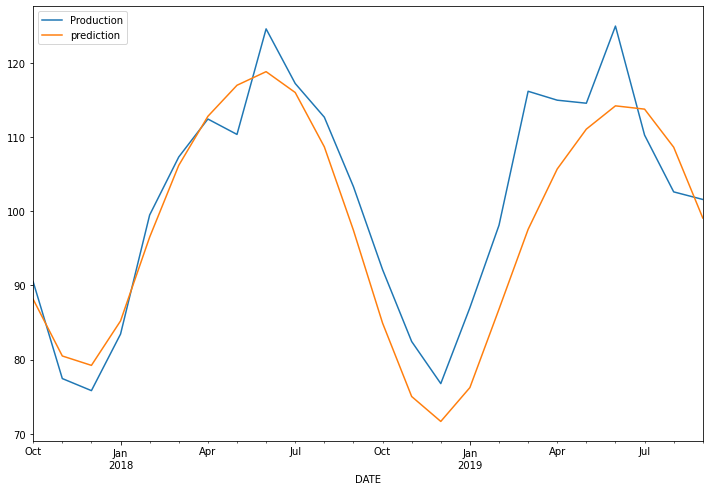

In [ ]:
test_set.plot(figsize=(12,8))

pour faire des predictions dans le futur

In [ ]:
full_scaler = MinMaxScaler()
full_scaled_data = full_scaler.fit_transform(df)
length = 12
generator = TimeseriesGenerator(full_scaled_data,full_scaled_data, length=length, batch_size=1)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(generator, epochs=6)

Epoch 1/6
561/561 [==============================] - 4s 5ms/step - loss: 0.0383
Epoch 2/6
561/561 [==============================] - 3s 5ms/step - loss: 0.0077
Epoch 3/6
561/561 [==============================] - 3s 5ms/step - loss: 0.0054
Epoch 4/6
561/561 [==============================] - 3s 5ms/step - loss: 0.0045
Epoch 5/6
561/561 [==============================] - 3s 5ms/step - loss: 0.0042
Epoch 6/6
561/561 [==============================] - 3s 6ms/step - loss: 0.0036


In [ ]:
forecast = []

periods = 12
first_eval_batch = full_scaled_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)



In [ ]:
forecast= scaler.inverse_transform(forecast)

In [ ]:
forecast

array([[ 91.18997575],
       [ 85.93992133],
       [ 85.34595204],
       [ 92.92909806],
       [104.29318421],
       [113.82446244],
       [119.20086541],
       [123.7101846 ],
       [124.58325589],
       [117.11193838],
       [109.60833908],
       [101.31891988]])

In [ ]:
df


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [ ]:
forecast_index = pd.date_range(start='2019-10-01',periods=12, freq = 'MS')

In [ ]:
forecast_df = pd.DataFrame( data=forecast, index=forecast_index, columns=['Forecast'])

In [ ]:
forecast_df

,Forecast
2019-10-01,91.189976
2019-11-01,85.939921
2019-12-01,85.345952
2020-01-01,92.929098
2020-02-01,104.293184
2020-03-01,113.824462
2020-04-01,119.200865
2020-05-01,123.710185
2020-06-01,124.583256
2020-07-01,117.111938


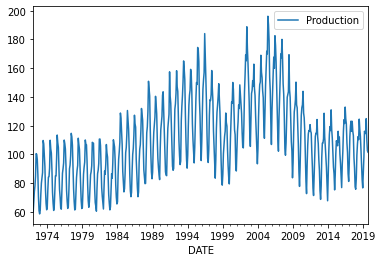

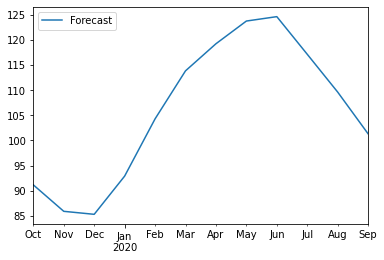

In [ ]:
df.plot()

forecast_df.plot()

(576.0, 608.0)

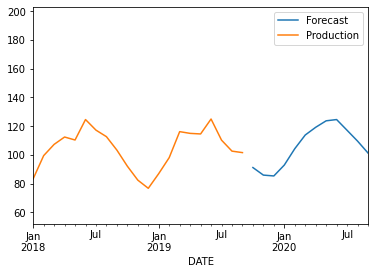

In [ ]:
ax = forecast_df.plot()
df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-09-01')



**Tâche : Calculer votre RMSE.**

In [ ]:
# Code ici
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(test_set['Production'], test_set['prediction']))

6.956496978415849

**Note : Consultez la fin de la vidéo sur les solutions pour voir une discussion sur l'amélioration de ces résultats !**


---



---



**Bravo, très bon travail !**